<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02-Machine-Learning/notebooks/05-Clasificacion-Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación Lineal

En esta notebook construiremos un clasificador lineal usando mínimos cuadrados. 

La clasificación es un problema de modelación en el cual se predice una etiqueta para cada dato de entrada.

Es decir, se trata de asignar etiquetas a puntos, tratando de predecir las etiquetas reales de los puntos.

* **Clasificación Binaria**: Dos etiquetas, mutuamente exclusivas.
* **Clasificación Multi-clase**: Varias etiquetas mutuamente excluyentes.
* **Clasificación Multi-etiqueta**: Cada instancia tiene varias etiquetas.

&#128214; <u>Referencias bibliográficas</u>:
* Bishop, Christopher M. (2006). Pattern recognition and machine learning. New York. Springer.
* Flach, Peter (2012). Machine Learning: The Art and Science of Algorithms that Make Sense of Data. Cambridge University Press.

Ejemplo de un conjunto de puntos linealmente separables con dos clases. Clasificación Binaria.

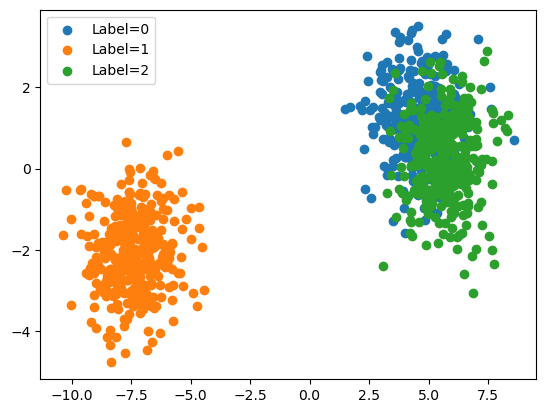

In [2]:
#zal

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=3, random_state=28)
counter = Counter(y)

for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f"Label={str(label)}")
plt.legend()
plt.show()

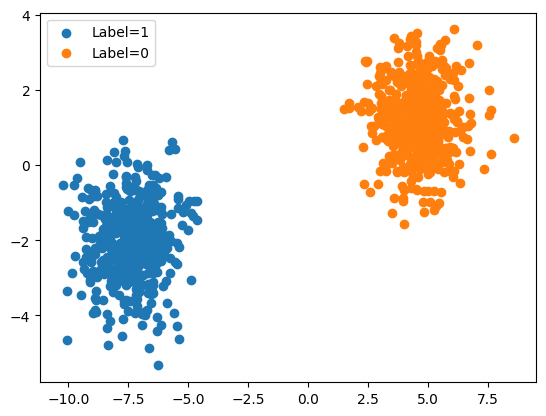

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, random_state=28)
counter = Counter(y)

for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f"Label={str(label)}")
plt.legend()
plt.show()

Counter es una función que construye un diccionario con los conteos de cada clase.

In [3]:
counter

Counter({0: 334, 1: 333, 2: 333})

Ejemplo con tres clases

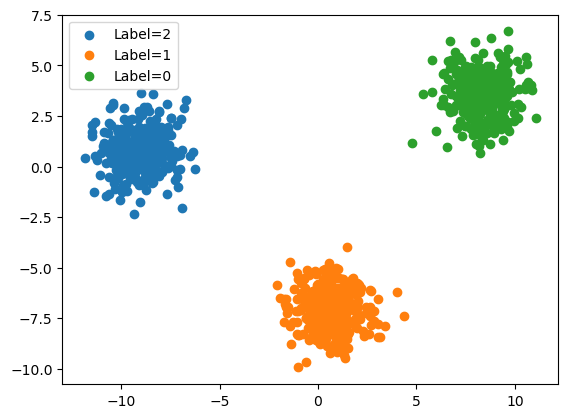

In [4]:
# zal
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, 
                centers=3, 
				random_state=2809			
				)
counter = Counter(y)

for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f"Label={str(label)}")
plt.legend()
plt.show()

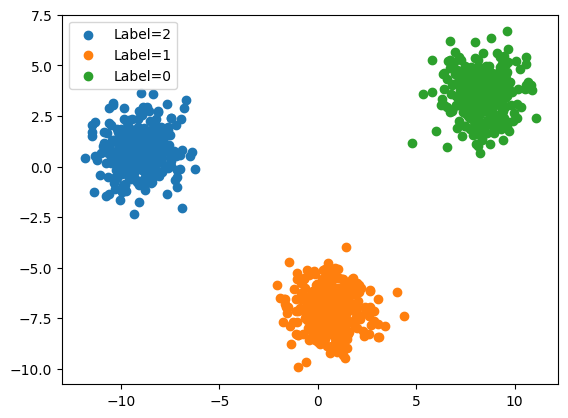

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, 
                centers=3, 
				random_state=2809			
				)
counter = Counter(y)

for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f"Label={str(label)}")
plt.legend()
plt.show()

## Discriminantes de 2 clases

* La función discriminante más simple es la que obtenemos mediante una función lineal del vector de entrada:

$$
y(\textrm{x})=\textrm{w}^\textrm{T}\textrm{x}+w_{0} 
$$

* $\textrm{w}$ es el **vector de pesos**, y $w_0$ es el bias (sesgo / intercepto). 
* A $-w_0$ se le conoce como el **umbral** (_threshold_).
* Un vector de entrada $\textrm{x}$ será asignado a la clase $\mathcal{C}_{1}$ si $y(\textrm{x}) \geq 0$ y a la clase $\mathcal{C}_{2}$ de lo contrario.
* La frontera de decisión (FD) está definida por la relación $y(\textrm{x}) = 0$, que corresponde a un hyperplano de dimensión $(D-1)$ dentro del espacio $D-$dimensional de entrada.
* Para cualesquiera dos puntos $\textrm{x}_A$ y $\textrm{x}_B$ tales que $y(\textrm{x}_A) = y(\textrm{x}_B) = 0$, se tiene que $\textrm{w}^\textrm{T}(\textrm{x}_A-\textrm{x}_B)=0$, y por lo tanto, $w$ es ortogonal a cualquier vector en la FD. 
* De esta forma, $\textrm{w}$ **determina la orientación de la FD**. 
* La distancia normal del origen a la FD está dada por:

$$
\frac{w_0}{\left\lVert\textrm{w}\right\rVert}
$$

* En muchas ocasiones es conveniente usar una notación más compacta, por lo que escribiremos: $\tilde{\textrm{w}}=(w_0,\textrm{w})$ y $\tilde{\textrm{x}}=(1,\textrm{x})$, por lo que:

$$
y(\textrm{x})=\tilde{\textrm{w}}^\textrm{T}\tilde{\textrm{x}}
$$

* En este caso, la FD son hyperplanos que pasan por el origen del espacio $(D+1)-$dimensional expandido de la entrada.

## Ejemplo 1-dimensional

En el siguiente ejemplo podemos probar con varias parejas de parámetros $w,w_0$ para definir diferentes fronteras de decisión e intentar separar correctamente los datos de entrada.

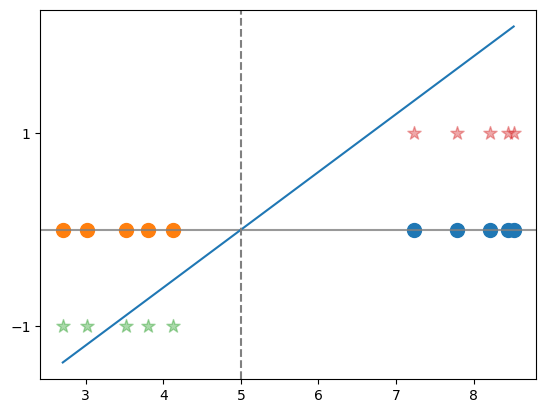

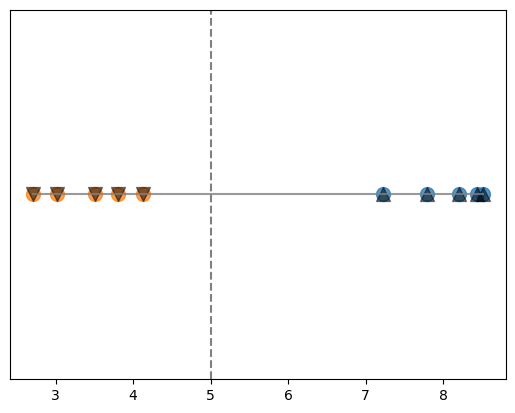

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter

#--- Obtenemos el conjunto de puntos y etiquetas ---
X, y = make_blobs(n_samples=10, 
                centers=2, 
				n_features=1,
                random_state=2809			
				)

counter = Counter(y)

#--- Definimos los parámetros de la frontera de decisión ---
w = 0.6     # peso 
w_0 = -3     # sesgo

#--- Obtener el máximo y mínimo del conjunto X para graficar la FD ---
a = min(-w_0/w,np.min(X))
b = np.max(X)
x_line = np.linspace(a,b,num=10)
y_line = [w*x + w_0 for x in x_line]

signs_evals = np.sign([w*x + w_0 for x in X])  # f(g(x)) para cada x del conjunto X

#--- Graficar ---
plt.figure()
plt.axhline(0, color='gray',alpha=0.8) # Dibujar el eje horizontal
for label, _ in counter.items():  # Graficar cada etiqueta real de los puntos
    row_ix = np.where(y == label)[0]
    puntos = X[row_ix]
    plt.scatter(puntos,[0 for p in puntos],s=100)
for sign in [-1,1]:  # Graficar cada etiqueta predecida de los puntos
    row_ix = np.where(signs_evals == sign)[0]
    signos = signs_evals[row_ix]
    puntos = X[row_ix]
    plt.scatter(puntos,signos,marker='*',s=100,alpha=0.4)
plt.plot(x_line,y_line) # Graficar la frontera de decisión
plt.axvline(-w_0/w,color='gray',linestyle="dashed")
plt.yticks([-1,1])
plt.show()

#--- Graficar ---
plt.figure()
plt.plot([a,b],[0,0], color='gray',alpha=0.8) # Dibujar el eje horizontal
for label, _ in counter.items():  # Graficar cada etiqueta real de los puntos
    row_ix = np.where(y == label)[0]
    puntos = X[row_ix]
    plt.scatter(puntos,[0 for p in puntos],alpha=0.75,s=100)
signos = ['v','^']
for signo,sign in zip(signos,[-1,1]):  # Graficar cada etiqueta predecida de los puntos
    row_ix = np.where(signs_evals == sign)[0]
    signos = signs_evals[row_ix]
    puntos = X[row_ix]
    plt.scatter(puntos,[0 for p in puntos],marker=signo,color='black',s=100,alpha=0.5)
plt.axvline(-w_0/w,color='gray',linestyle="dashed")
plt.yticks([])
plt.show()

# Mínimos cuadrados para la clasificación

¿Cómo obtenemos los parámetros del clasificador?

* Podemos usar Mínimos Cuadrados (*Ordinary Least Squares*, OLS) como una herramienta de clasificación.
* Cada clase $\mathcal{C}_j$ se describe por su propio modelo lineal:

$$
y_j(\textrm{x})=\textrm{w}^\textrm{T}_j\textrm{x}+w_{j,0}
$$
&emsp;&ensp;&nbsp; donde $j=1,\ldots,k$. Podemos agrupar los términos como:

$$
\mathbf{y}(\textrm{x})=\mathbf{W}^\textrm{T} \tilde{\textrm{x}}
$$

* Para encontrar $\mathbf{W}$ podemos minimizar la suma de los residuales al cuadrado como se hizo en la Regresión Lineal.

* Consideremos un conjunto de entrenamiento $\{\textrm{x}_n,t_n\}$, donde $n=1,\ldots,N$, definimos la matrices $\mathbf{t}$ y $X$ como en las diapositivas. 


* Como hemos visto, la solución para $\mathbf{W}$ está dada por:
$$
\mathbf{W}=(\mathbf{X}^\textrm{T}\mathbf{X})^{-1}\mathbf{X}^{\textrm{T}}\mathbf{t}=\mathbf{X}^\dagger\mathbf{t}
$$
donde $\mathbf{X}^\dagger$ es la pseudo-inversa de Moore-Penrose de $\mathbf{X}$.

* La función discriminante que usamos para clasificar un conjunto de puntos definido por $Z$ es entonces:
$$
\textrm{y}(Z)=\tilde{Z}\mathbf{W}=\tilde{Z} \mathbf{X}^\dagger \mathbf{t}
$$
la cual es de tamaño $N\times n$, donde $N$ es el número de instancias y $n$ el número de etiquetas.

## Un ejemplo sencillo

Función para generar datos. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def genera_datos(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers:
        x_out = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_out]), np.concatenate([np.zeros(25), np.ones(30)]).astype(int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(int)

Generamos y graficamos el conjunto de entrenamiento.

In [19]:
type(y_train)

numpy.ndarray

x_train:
[[-0.90615338 -1.78923137]
 [-0.38385094 -0.84651633]
 [ 0.22903882 -0.18064803]
 [-0.21926675 -1.39368942]]
Shape: (50, 2)
y_train:
[0 0 0 0]
Shape: (50,)


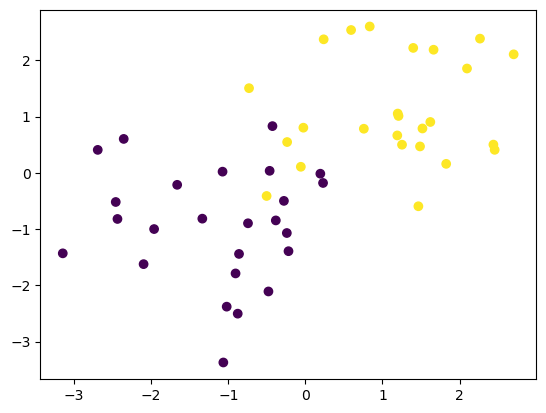

In [8]:
x_train, y_train = genera_datos(add_outliers=False,add_class=False)
print(f"x_train:\n{x_train[:4]}")
print(f"Shape: {x_train.shape}")
print(f"y_train:\n{y_train[:4]}")
print(f"Shape: {y_train.shape}")

#--- Graficar ---
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()

Generamos el conjunto de prueba. Este conjunto es todo el rectángulo $[-5,5]\times[-5,5]$. Lo usamos para visualizar las regiones de clasificación.

Shape x1_test=(100, 100)
x_test.shape=(10000, 2)


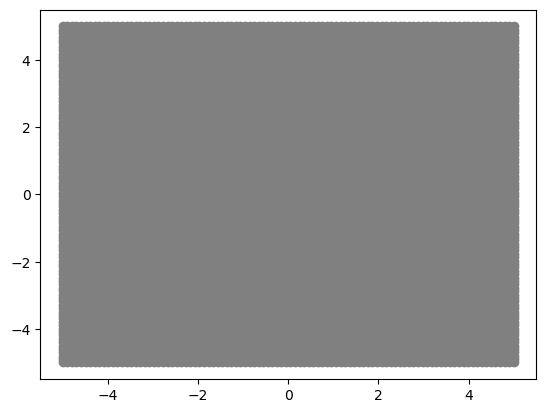

In [9]:
size = 100

x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, size), np.linspace(-5, 5, size))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

print(f"Shape x1_test={x1_test.shape}")
print(f"x_test.shape={x_test.shape}")

plt.figure()
plt.scatter(x_test[:,0], x_test[:,1],color='gray')
plt.show()

Preparamos las matrices de puntos agregando la columna *bias* usando `PolynomialFeatures`.

🔵 ¿Por qué podemos hacerlo así?

In [10]:
from sklearn import preprocessing

features = preprocessing.PolynomialFeatures(1)
X_train = features.fit_transform(x_train)
X_test = features.transform(x_test)

print('X_train:=')
print(X_train[:3])
print('X_train.shape=',X_train.shape)

print('X_test:=')
print(X_test[:3],X_test.shape)

X_train:=
[[ 1.         -0.90615338 -1.78923137]
 [ 1.         -0.38385094 -0.84651633]
 [ 1.          0.22903882 -0.18064803]]
X_train.shape= (50, 3)
X_test:=
[[ 1.        -5.        -5.       ]
 [ 1.        -4.8989899 -5.       ]
 [ 1.        -4.7979798 -5.       ]] (10000, 3)


La siguiente función convierte el valor de la clase $0,1,...,n$ en un vector *one-hot*.

**Estrategia:** Para este fin, si tenemos un vector de clases, por ejemplo, $y=(0,1,0,2,0,0,2,1)$, consideramos la matriz identidad de $3\times 3$

$$\left( \begin{array}{ccc} 1 & 0 & 0 \\ 
0 & 1 & 0 \\
0 & 0 & 1\end{array}\right)$$ 

La codificación *one-hot* correspondiente al valor de la clase es la fila $j$-sima de la matriz anterior.

In [11]:
def encoderT(y:np.ndarray):
    K = np.max(y) + 1 # 
    enc = np.eye(K)
    return enc[y]

T = encoderT(y_train)

print('T.shape= {}'.format(T.shape))
print(y_train[:3])
print(T[:3])

T.shape= (50, 2)
[0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]]


In [12]:
"""----TU CODIGO AQUÍ---------"""

"""----------------------------"""
W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ T 

print('W:=')
print(W)
print('\nW.shape={}'.format(W.shape))

W:=
[[ 0.51260463  0.48739537]
 [-0.18201108  0.18201108]
 [-0.14715887  0.14715887]]

W.shape=(3, 2)


In [13]:
y_x = X_test@W
y = np.argmax(y_x,axis=1)
print(y)
print(y.shape)

[0 0 0 ... 1 1 1]
(10000,)


In [15]:
y_x

array([[ 2.15845439, -1.15845439],
       [ 2.14006943, -1.14006943],
       [ 2.12168447, -1.12168447],
       ...,
       [-1.09647521,  2.09647521],
       [-1.11486017,  2.11486017],
       [-1.13324513,  2.13324513]])

⭕ Juntamos todo lo anterior en una clase. Esta clase es la implementación del clasificador de mínimos cuadrados.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

class LeastSquaresClassifier():
    def __init__(self, W:np.ndarray=None):
        '''
        W es la matriz de pesos, la cual puede ser especificada desde un principio, esto
        es opcional.
        '''
        self.W = W
        
    def encoderT(self, y:np.ndarray):
        K = np.max(y) + 1 # 
        enc = np.eye(K)
        return enc[y]

    def fit(self, X:np.ndarray, y:np.ndarray):
        '''
        Este método calcula la matriz de pesos para la matriz de puntos "aumentada" X
        y el conjunto de etiquetas y.
        '''
        #---------
        # completa el código
        #---------
        
        y = self.encoderT(y)
        
        self.W = np.linalg.inv(X.T @ X) @ X.T @ y 
        
    def clasifica(self, X:np.ndarray):
        '''
        Este método predice las etiquetas para el conjunto de puntos X
        '''
        return np.argmax(X@self.W,axis=1)

Graficamos los puntos de entrenamiento, de prueba (las regiones de clases) y la frontera de decisión. 

Observa que la clasificación no es perfecta.

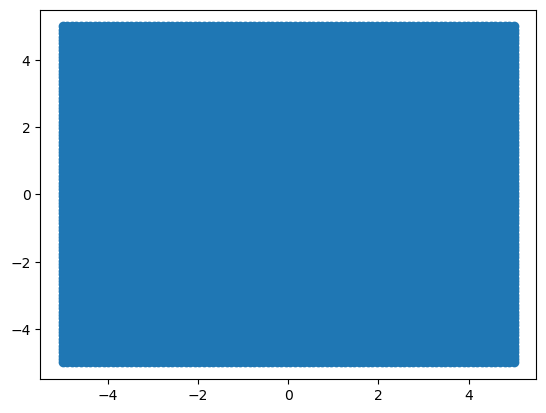

In [24]:
x_test
plt.figure()
plt.scatter(x1_test, x2_test)

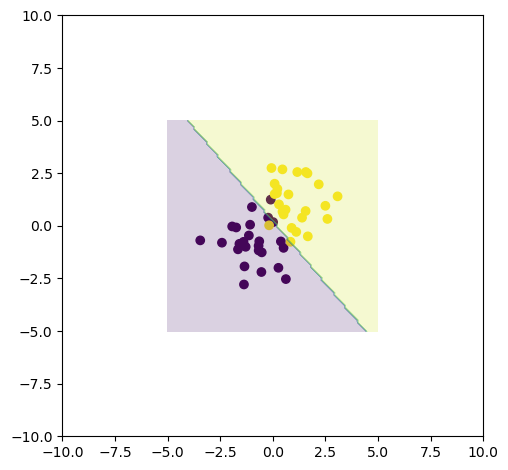

In [37]:
x_train, y_train = genera_datos()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

features = preprocessing.PolynomialFeatures(1)
X_train = features.fit_transform(x_train)
X_test = features.transform(x_test)

"""----TU CODIGO AQUÍ---------"""
#CREA el objeto
cl = LeastSquaresClassifier()

#ENTRENA el modelo
cl.fit(X_train, y_train)

#PRUEBA el modelo
y = cl.clasifica(X_test)
"""----------------------------"""

plt.figure()
#-----Dibuja los datos---------------------------------
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
#-----Dibuja X_test---------------------------------
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2)
#-----Formato de la gráfica------------------------
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

Clasificamos un nuevo punto

In [28]:
new_x

array([[-1,  0]])

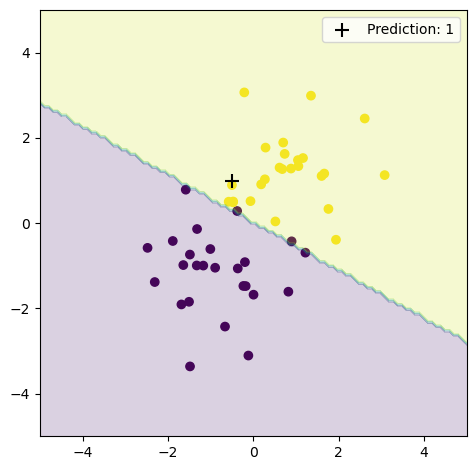

In [36]:
new_x = np.array([[-1,0]])
new_x = np.array([[-1,1]])
new_x = np.array([[-.5,0]])
new_x = np.array([[-.5,1]])

X_new = features.transform(new_x)
y_pred_new = cl.clasifica(X_new)

plt.figure()
#-----Dibuja los datos---------------------------------
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
#-----Dibuja X_test---------------------------------
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2)
plt.scatter(new_x[:,0],new_x[:,1], c='black', marker='+',
            label=f"Prediction: {str(y_pred_new[0])}",s=100)
plt.legend()
#-----Formato de la gráfica------------------------
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

### Métricas de rendimiento

Veamos como fue el rendimiento de la clasificación usando los datos de entrenamiento. Usaremos métricas de rendimiento para la clasificación implementadas en sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
y_train_pred = modelo.clasifica(X_train)

In [ ]:
print(f"Valores reales:\n{y_train[:10]}")
print(f"Valores predichos:\n{y_train_pred[:10]}")

Usemos, por ahora, *accuracy* y *recall*. Varias de estas métricas requieren parámetros adicionales cuando es clasificación multi-clase. **Ver documentación.**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score

print(f"Accuracy: {accuracy_score(y_train,y_train_pred)}")
print(f"Recall: {recall_score(y_train,y_train_pred)}")

Veamos la matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_train_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show() 

## ⭕ Práctica

En este ejercicio nos interesa observar el efecto de los outliers y de una tercera clase en el clasificador LS.



---



1. Efecto de outliers
   1. Genera un nuevo conjunto de datos de entrenamiento con outliers usando la función `genera_datos(add_outliers=True)`. A partir de este conjunto de datos puedes recuperar el conjunto de datos sin los outliers, los outliers son los últimos 5 puntos (renglones) de la matriz de coordenadas. Visualiza como se ven los datos.
   2. Tendrás dos conjuntos de entrenamiento, uno con los outliers y otro sin los outliers.
   3. Crea un clasificador para cada conjunto de datos y grafica la frontera de decisión en ambos casos.
   4. Compara las FD del primer modelo y de este segundo modelo.
   5. Compara las métricas de rendimiento de ambos clasificadores en el conjunto de entrenamiento, considera accuracy, precision, recall y f1 score. Además, visualiza las matrices de confusión. 
2. Efecto de 3 clases
   1. Genera otro conjunto de datos de entrenamiento con 3 clases usando la función `genera_datos(add_class=True)`; usa un meshgrid de -5 a 10. Visualiza como se ven los datos.
   2. Crea un nuevo clasificador y entrénalo con estos datos de 3 clases.
   3. Prueba el clasificador con datos de Test y observa las FD (es posible que necesites ajustar los límites de los ejes (x,y)).
   4. Reporta las métricas de rendimiento del clasificador en el conjunto de entrenamiento, considera accuracy, precision, recall y f1 score. Además, visualiza la matriz de confusión.